## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv('adult.csv')
df.sample
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# 1. Exploring dataset

## Which variables are categorical, and which are numerical?

In [3]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical")
print(categorical_columns)
print("Numerical")
print(numerical_columns)

Categorical
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Categorical data are workclass, education, marital-status, occupation, relationship, race, gender  
Numerical data are age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week

In [5]:
df.mean(numeric_only=True)

age                    38.643585
fnlwgt             189664.134597
educational-num        10.078089
capital-gain         1079.067626
capital-loss           87.502314
hours-per-week         40.422382
dtype: float64

In [6]:
num_columns = ['age', 'fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
num_df = df[num_columns]
num_df.median()

age                    37.0
fnlwgt             178144.5
educational-num        10.0
capital-gain            0.0
capital-loss            0.0
hours-per-week         40.0
dtype: float64

## Explore the values and/or outliers.

<Axes: >

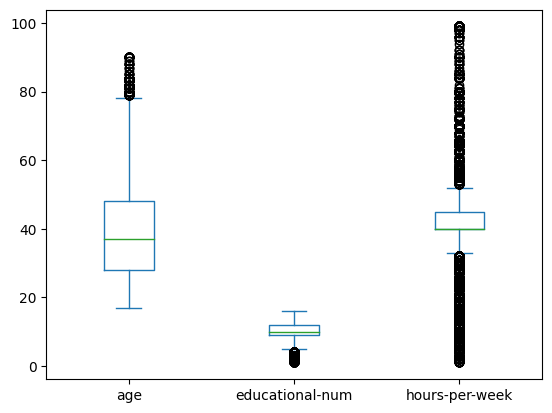

In [7]:
df[['age','educational-num','hours-per-week']].plot.box()

<Axes: >

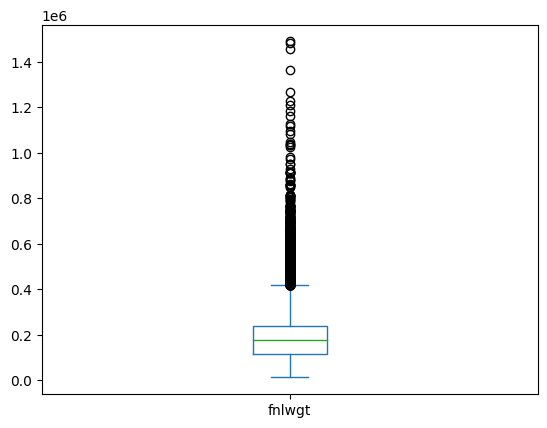

In [8]:
df[['fnlwgt']].plot.box()

<Axes: >

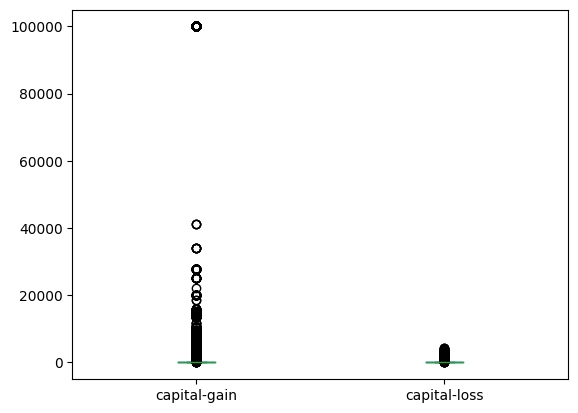

In [9]:
df[['capital-gain','capital-loss']].plot.box()

## Explore the categorical variables.

<Axes: xlabel='race', ylabel='count'>

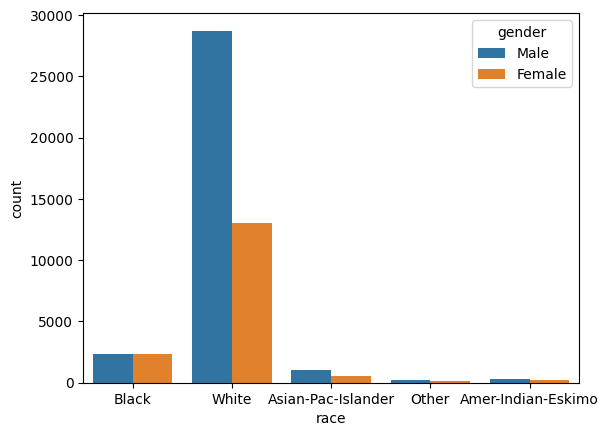

In [10]:
sns.countplot(data=df, x="race", hue="gender")

จะสังเกตว่าคนผิวขาวมีจำนวนมากที่สุด และมีผู้ชายมากกว่าผู้หญิงสำหรับทุกชาติพันธ์

<Axes: xlabel='workclass', ylabel='count'>

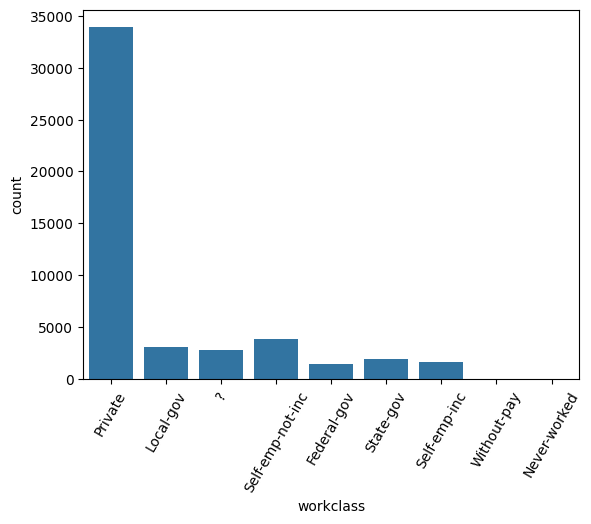

In [11]:
plt.xticks(rotation=60)
sns.countplot(data=df,x='workclass')

<Axes: xlabel='education', ylabel='count'>

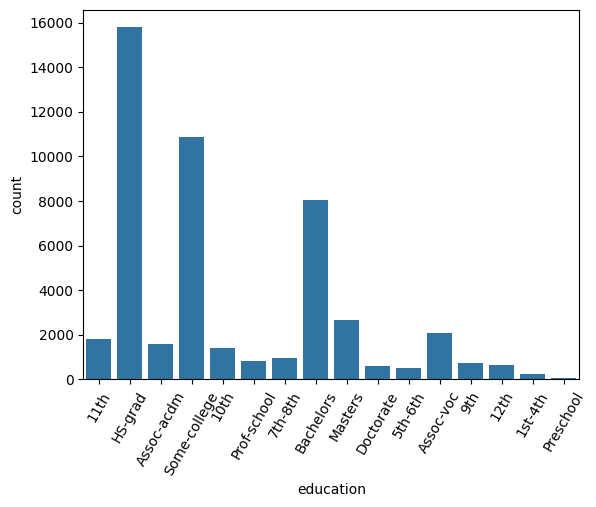

In [12]:
plt.xticks(rotation=60)
sns.countplot(data=df,x='education')

<Axes: xlabel='marital-status', ylabel='count'>

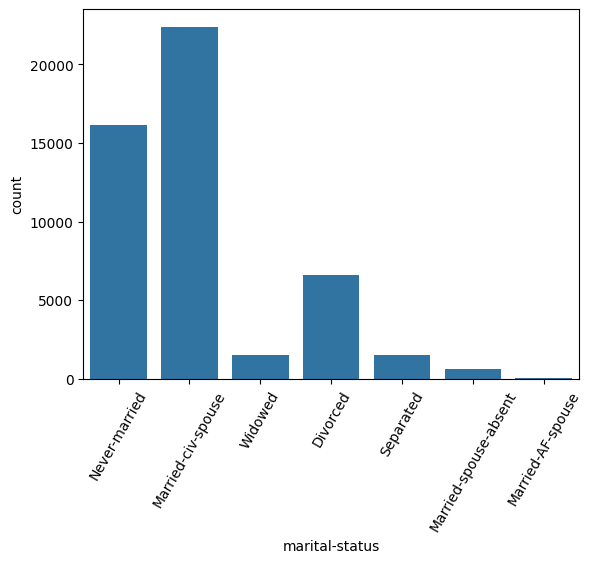

In [13]:
plt.xticks(rotation=60)
sns.countplot(data=df,x='marital-status')

<Axes: xlabel='occupation', ylabel='count'>

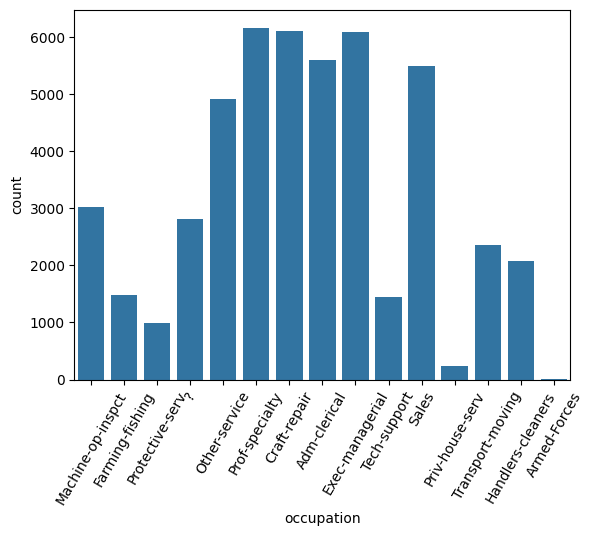

In [14]:
plt.xticks(rotation=60)
sns.countplot(data=df,x='occupation')

<Axes: xlabel='relationship', ylabel='count'>

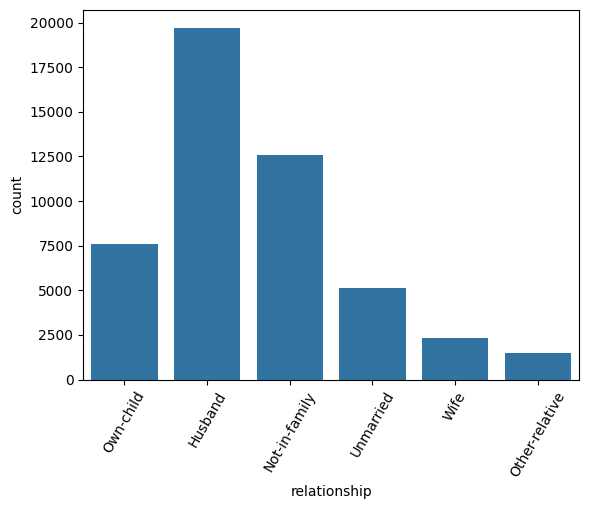

In [15]:
plt.xticks(rotation=60)
sns.countplot(data=df,x='relationship')

<Axes: xlabel='income', ylabel='count'>

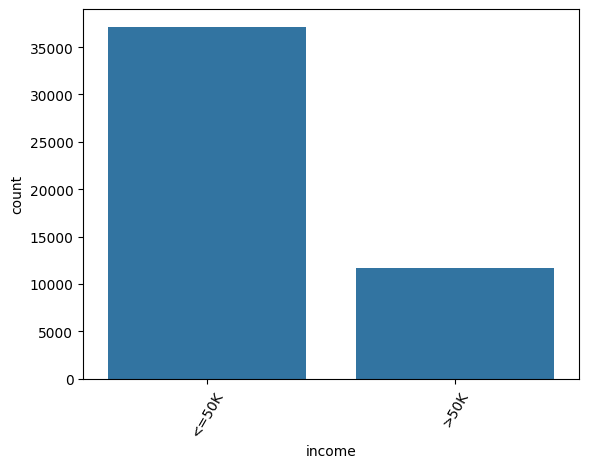

In [16]:
plt.xticks(rotation=60)
sns.countplot(data=df,x='income')

<Axes: xlabel='native-country', ylabel='Count'>

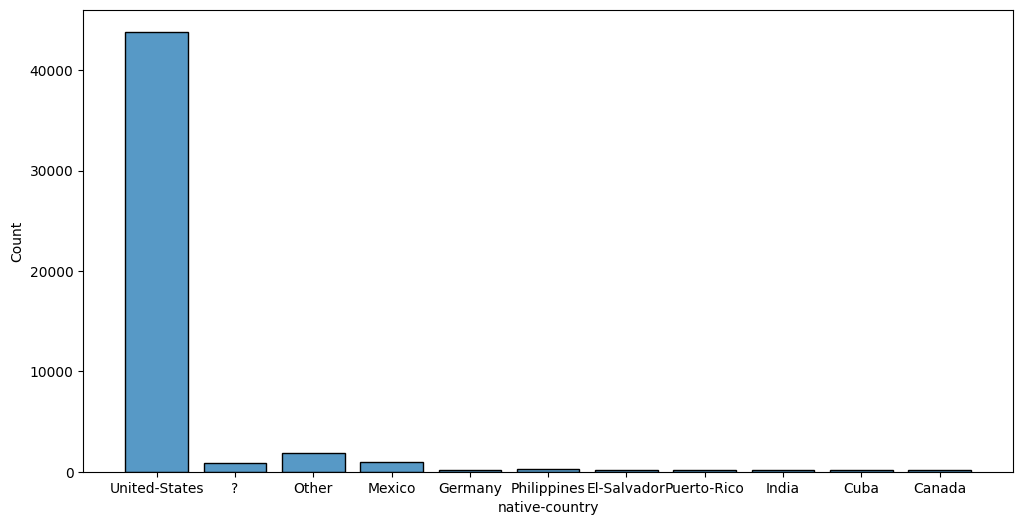

In [17]:
category_counts = df['native-country'].value_counts()
top_categories = category_counts.nlargest(10).index
plt.figure(figsize=(12, 6))
sns.histplot(df['native-country'].apply(lambda x: x if x in top_categories else 'Other'), shrink=0.8)

จำนวนคนที่เป็นชาวอเมริกันมีจำนวนมากที่สุด

## Explore the numerical variables.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

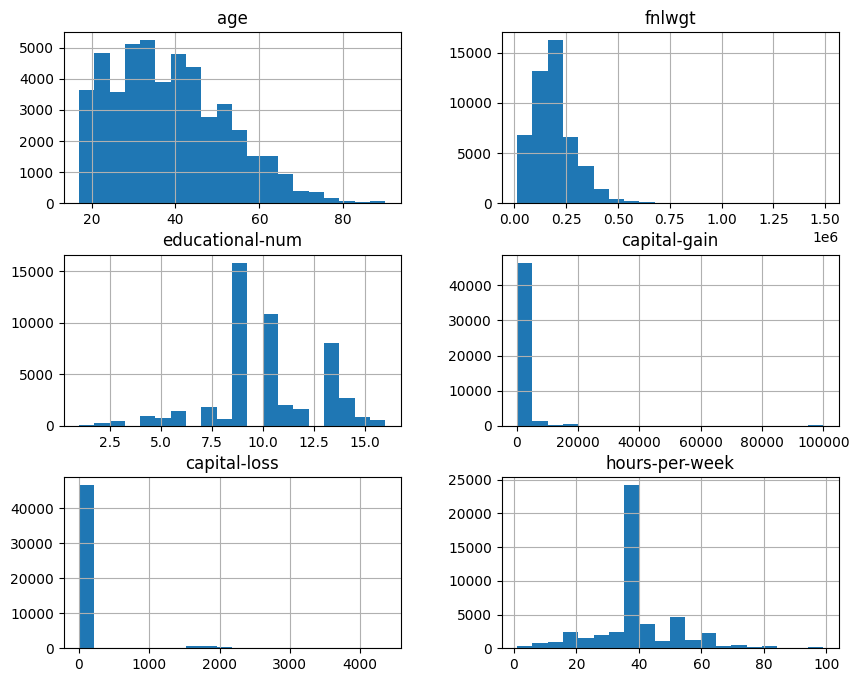

In [18]:
selected_var = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[selected_var].hist(bins=20, figsize=(10, 8))

# 2. Processing missing values and/or outliers

## Explain how you handle the missing of categorical or/and numerical variables?

<Axes: >

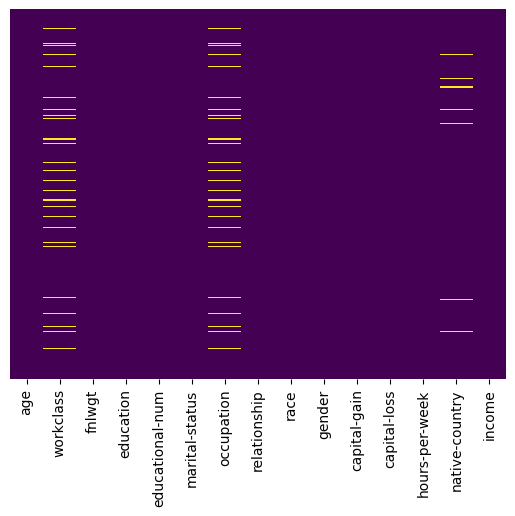

In [19]:
check_question = df.applymap(lambda x: x == '?')
sns.heatmap(check_question, yticklabels=False, cbar=False, cmap='viridis')
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

พบว่ามี missing data ที่ workclass, occupation, native-country ซึ่งเป็นข้อมูลประเภท categorical ทั้งหมด  
เราจะทำการแทนที่ '?' ด้วย mode ของ column นั้น

<Axes: >

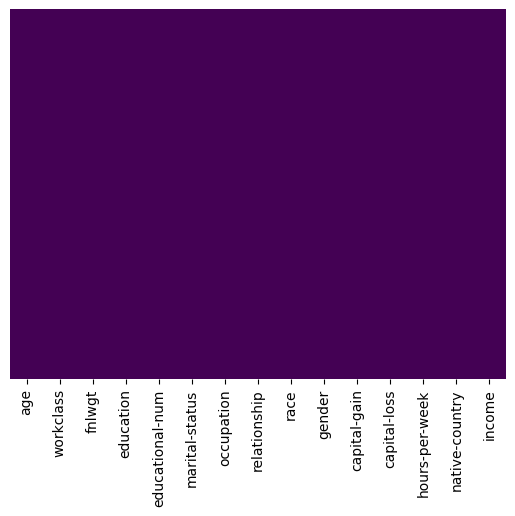

In [20]:
selected_columns = ['workclass', 'occupation', 'native-country']
selected_df = df[selected_columns]

# Replace '?' with the mode value in each selected categorical column
for col in selected_columns:
    mode_value = selected_df[col].mode()[0]
    df[col] = df[col].apply(lambda x: mode_value if x == '?' else x)

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

ในส่วนของ outlier เราจะทำการตัดข้อมูลที่เป็น outlier ทั้งหมดก่อนทำการคำนวณ  
วิธีการตัด outlier ทำได้ดังนี้

<Axes: >

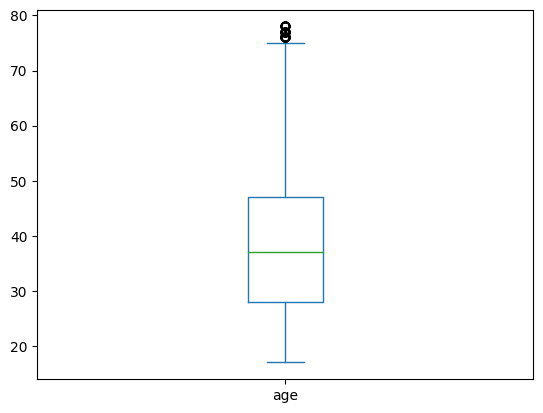

In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
Left_Outliers = Q1 - 1.5 * IQR
Right_Outliers = Q3 + 1.5 * IQR
new_df = df[(df['age'] >=  Left_Outliers) & (df['age'] <= Right_Outliers)]
new_df['age'].plot.box()

ทำการตัด outlier สำหรับทุกๆ numerical number

In [22]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

for num in numerical_columns:
    Q1 = df[num].quantile(0.25)
    Q3 = df[num].quantile(0.75)
    IQR = Q3 - Q1
    Left_Outliers = Q1 - 1.5 * IQR
    Right_Outliers = Q3 + 1.5 * IQR
    df = df[(df[num] >= Left_Outliers) & (df[num] <= Right_Outliers)]

# 3. Processing categorical and/or numerical data

เนื่องจาก income เป็น nominal data เพียง column เดียวเพราะฉะนั้น เราจะทำ label encoding ส่วน categorical data ที่เหลือเราจะทำ one-hot encoding

## Transform categorical data to numerical data

In [23]:
y_df = df[['income']]
df.drop(['income'],axis=1,inplace=True)
X_df = df
with pd.option_context('display.max_rows', 10): display(X_df)

X = X_df.values
y = y_df.values
print(y)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States


[['<=50K']
 ['<=50K']
 ['>50K']
 ...
 ['<=50K']
 ['>50K']
 ['<=50K']]


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y)

[0 0 1 ... 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


จะได้ค่า 0 หมายถึง income <=50K และ 1 หมายถึง income >50K

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_one_hot = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), categorical_one_hot)],remainder='passthrough')
X = np.array(ct.fit_transform(df))
print(X)

[[ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 50.]
 [ 0.  1.  0. ...  0.  0. 40.]
 ...
 [ 0.  0.  0. ...  0.  0. 38.]
 [ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 40.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


จากนี้เราจะได้ทุก column เป็น numerical data ทั้งหมด

# 4. Feature scaling & Split Train/Test data

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [27]:
print(X_train)

[[ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 45.]
 [ 0.  0.  0. ...  0.  0. 40.]
 ...
 [ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 40.]]


In [28]:
print(X_test)

[[ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 40.]
 ...
 [ 0.  0.  0. ...  0.  0. 40.]
 [ 0.  1.  0. ...  0.  0. 40.]
 [ 0.  0.  0. ...  0.  0. 40.]]


In [29]:
print(y_train)

[0 1 0 ... 0 1 0]


In [30]:
print(y_test)

[0 0 1 ... 0 0 0]


## Feature Scaling on Training Set & Test Set

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [32]:
print(X_train)

[[ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          0.          0.         ...  0.          0.
   0.88542307]
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 ...
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]]


In [33]:
print(X_test)

[[ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 ...
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          1.          0.         ...  0.          0.
  -0.37530496]
 [ 0.          0.          0.         ...  0.          0.
  -0.37530496]]


## Train Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
# ประเมินประสิทธิภาพของ Model ที่ Test Data
print('Test set accuracy:', model.score(X_test, y_test))

Test set accuracy: 0.8384103641456583
